In [1]:
import os
import warnings
import certifi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,10)
import numpy as np
import pickle
from collections import Counter

In [2]:
df = pd.read_csv('final_large_data.csv')

In [3]:
def analysis(data):
    missing_percent = data.isnull().sum() * 100 / len(data)
    total_missing = data.isnull().sum()
    unique = data.nunique()
    not_null = data.notnull().sum()
    df = pd.DataFrame({'Unique Values': unique,
                        'Value Exist': not_null,
                        'Total_Missing': total_missing,
                         'Missing %': missing_percent})
    print('Data Shape: ',data.shape)
    df = df.round(2)
    return df

In [4]:
df.dropna(inplace=True)
analysis(df)

Data Shape:  (408428, 2)


,Unique Values,Value Exist,Total_Missing,Missing %
status_text,406878,408428,0,0.0
label,9,408428,0,0.0


In [5]:
X_text = df['status_text'].values
y_label = df['label'].values

In [6]:
len(X_text)

408428

In [7]:
len(y_label)

408428

In [8]:
X_text[0]

'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে

In [9]:
y_label[0]

'bangladesh'

In [10]:
set(y_label)

{'bangladesh',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [11]:
print(len(X_text))
print(len(y_label))

408428
408428


In [12]:
type(y_label)

numpy.ndarray

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
class_labels = encoder.fit_transform(y_label)

In [14]:
set(class_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [15]:
encoder.inverse_transform([[3]])

array(['entertainment'], dtype=object)

In [16]:
class_labels.shape

(408428,)

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
class_labels = class_labels.reshape((class_labels.shape[0], 1))
y_ohe = encoder.fit_transform(class_labels)

In [18]:
class_labels[0]

array([0])

In [19]:
y_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
y_ohe.shape

(408428, 9)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text)

X_token = tokenizer.texts_to_sequences(X_text)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [37]:
vocab_size

2413449

In [38]:
tokenizer.texts_to_sequences(['দ্রব্যমূল্য নিয়ন্ত্রণে অভিযান শুরুর আগে বাজারের নাম ফাঁস হয়ে যাচ্ছে। এই অভিযোগ উঠে এসেছে বাজার তদারকি জোরদার করা নিয়ে আয়োজিত বাণিজ্য মন্ত্রণালয়ের একটি সভায়। সভায় বাণিজ্য মন্ত্রণালয়ের একজন যুগ্ম সচিব বলেন, আগে বাজারে অভিযানের দিন রিজার্ভ পুলিশের সদস্যদের পাওয়া যেত। এখন সংশ্লিষ্ট থানা থেকে সদস্যদের নিয়ে অভিযান পরিচালনা করতে হয়। এতে বাজারের নাম আগেই প্রকাশ হয়ে যায়।  বৈঠকে আগের মতো রিজার্ভ পুলিশ সদস্যদের নিয়ে অভিযান চালানোর সিদ্ধান্ত হয়। এ জন্য পুলিশ সদস্যদের মোতায়েনের জন্য ঢাকা মেট্রোপলিটন পুলিশকে (ডিএমপি) অনুরোধ জানানো হয়। সংশ্লিষ্ট ব্যক্তিরা বলছেন, অভিযানের আগে বাজারের নাম ফাঁস হয়ে গেলে তদারকিতে কোনো লাভ হয় না। ব্যবসায়ীরা আগে থেকেই সতর্ক হয়ে যান। অনেক সময় দেখা যায়, ভ্রাম্যমাণ আদালত যাওয়ার পরই বেশির ভাগ দোকান বন্ধ করে দেওয়া হয়েছে।  সভায় বাজার তদারকির ক্ষেত্রে নানা দুর্বলতা উঠে আসে। সভায় এখন থেকে বাজারে অভিযানের ক্ষেত্রে সংশ্লিষ্ট ব্যবসায়ী সমিতিকে আরও বেশি সম্পৃক্ত করার সিদ্ধান্ত নেওয়া হয়। সভার কার্যবিবরণী থেকে এসব তথ্য জানা গেছে।  বাজার তদারকি দলের কার্যক্রম জোরদার করার লক্ষ্য নিয়ে বাণিজ্য মন্ত্রণালয়ে সভাটি অনুষ্ঠিত হয় গত ২৩ জানুয়ারি। এতে সভাপতিত্ব করেন বাণিজ্যসচিব শুভাশীষ বসু। সভায় বাণিজ্য মন্ত্রণালয়, শিল্প মন্ত্রণালয়, কৃষি মন্ত্রণালয়, খাদ্য মন্ত্রণালয়, ট্যারিফ কমিশন, রপ্তানি উন্নয়ন ব্যুরো (ইপিবি) , ট্রেডিং করপোরেশন অব বাংলাদেশ (টিসিবি) , বাংলাদেশ শিল্প ও বণিক সমিতি ফেডারেশন (এফবিসিসিআই) , ঢাকা উত্তর সিটি করপোরেশন ও জাতীয় ভোক্তা অধিকার সংরক্ষণ অধিদপ্তরের প্রতিনিধিরা উপস্থিত ছিলেন।  বাণিজ্য মন্ত্রণালয় পবিত্র রমজান মাসসহ বিভিন্ন সময়ে বাজারে তদারকি দল পাঠিয়ে থাকে। এসব তদারকি দল নানা অভিযোগে ব্যবসায়ীদের জরিমানা করে।'])

[[23713,
  1802,
  467,
  1098,
  49,
  1327,
  158,
  2576,
  30,
  832,
  7,
  127,
  731,
  910,
  612,
  7126,
  4199,
  5,
  15,
  1310,
  1499,
  767,
  14,
  28345,
  577,
  1499,
  767,
  148,
  803,
  770,
  6,
  49,
  490,
  2810,
  67,
  5441,
  202,
  1025,
  155,
  4234,
  53,
  625,
  1024,
  3,
  1025,
  15,
  467,
  595,
  16,
  18,
  110,
  1327,
  158,
  572,
  256,
  30,
  175,
  857,
  416,
  152,
  5441,
  58,
  1025,
  15,
  467,
  3050,
  288,
  18,
  2,
  9,
  58,
  1025,
  16758,
  9,
  91,
  6948,
  1754,
  5185,
  1322,
  491,
  18,
  625,
  1032,
  729,
  2810,
  49,
  1327,
  158,
  2576,
  30,
  435,
  29455,
  31,
  1413,
  39,
  21,
  2884,
  49,
  347,
  1624,
  30,
  384,
  69,
  35,
  71,
  117,
  1371,
  431,
  349,
  1516,
  795,
  569,
  1481,
  198,
  4,
  46,
  28,
  577,
  612,
  11764,
  213,
  290,
  5779,
  731,
  1170,
  577,
  53,
  3,
  490,
  2810,
  213,
  625,
  912,
  22553,
  50,
  76,
  3772,
  44,
  288,
  165,
  18,
  2529,
  28963

In [39]:
print(X_text[2])
print(X_token[2])

জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় নেতা খালেদা জিয়ার দেওয়া ভাষণে ভারত সম্পর্কে আনা নানা অভিযোগের জবাব দিয়েছে দেশটি। ভারতের পক্ষ থেকে এ সংক্রান্ত একটি লিখিত জবাব খালেদা জিয়াকে দেওয়া হয়েছে। আজ বৃহস্পতিবার রাতে বিএনপির গুলশান কার্যালয়ে খালেদা জিয়ার সঙ্গে বাংলাদেশে নিযুক্ত ভারতের হাইকমিশনার পঙ্কজ সরণ সৌজন্য সাক্ষাত্ করেন। সেখানে তিনি খালেদা জিয়ার কাছে ভারতের জবাব সম্বলিত একটি চিঠি দেন। এ সময় বিএনপি চেয়ারপারসনের উপদেষ্টা রিয়াজ রহমান উপস্থিত ছিলেন। সৌজন্য সাক্ষাত্ শেষে রিয়াজ রহমান গুলশান কার্যালয় থেকে বেরিয়ে যাওয়ার সময় প্রথম আলো ডটকমকে একথা বলেন। তিনি জানান, এ ধরনের একটি চিঠি ভারতের পক্ষ থেকে সরকারকেও দেওয়া হয়েছে। বিএনপি চেয়ারপারসন ভারতের হাইকমিশনারকে বলেন, ‘আমরা এই বিষয়গুলো সম্পর্কে কিছুই জানতে পারছি না। ভারত ও বাংলাদেশ সরকারের পক্ষ থেকেও কোনো কিছু জানানো হচ্ছিল না।’ গত ২৯ জুন সংসদে দেওয়া ভাষণে খালেদা জিয়া নারায়ণগঞ্জের কনটেইনার টার্মিনাল নির্মাণের জন্য বাংলাদেশকে না জানিয়ে ভারতের দরপত্র আহ্বান, তিস্তা চুক্তি না হওয়া, টিপাইমুখ বাঁধ নির্মাণ ও সীমান্তে অব্য

In [40]:
len(X_token[0])

258

In [41]:
len(X_text[0])

1752

In [42]:
from keras_preprocessing.sequence import pad_sequences
maxlen = 300
X_pad = pad_sequences(X_token, padding='post', maxlen=maxlen)

In [43]:
from collections import Counter

word_ls = []

for sen in X_text:
    word_ls.extend(sen.split())

In [44]:
len(word_ls)

109678174

In [45]:
Counter = Counter(word_ls)

In [46]:
most_occur = Counter.most_common(100)
print(most_occur)

[('ও', 1378969), ('এ', 737940), ('থেকে', 732706), ('করে', 699838), ('করা', 614734), ('বলেন,', 565353), ('এই', 552340), ('জন্য', 409721), ('তিনি', 390072), ('সঙ্গে', 378022), ('তাঁর', 368902), ('একটি', 350880), ('এক', 347677), ('নিয়ে', 335447), ('না', 322702), ('করতে', 316282), ('এবং', 312170), ('হয়।', 281108), ('মধ্যে', 273414), ('আর', 267909), ('না।', 254137), ('পর', 244514), ('প্রথম', 243004), ('ওই', 242435), ('কিন্তু', 241280), ('হয়েছে।', 235664), ('বলে', 226974), ('হয়ে', 222604), ('কোনো', 219931), ('কথা', 217626), ('গত', 217454), ('দুই', 213697), ('গতকাল', 210889), ('সময়', 210212), ('যে', 205382), ('এর', 201383), ('তবে', 200661), ('তা', 186705), ('হবে।', 186115), ('দিয়ে', 182785), ('হাজার', 181696), ('করার', 181361), ('তাঁদের', 178225), ('দেওয়া', 173766), ('শুরু', 165695), ('আরও', 162795), ('আগে', 162036), ('এখন', 156784), ('বা', 155063), ('কাজ', 153402), ('বছর', 153057), ('বিভিন্ন', 150626), ('করেন।', 147147), ('আজ', 145461), ('সব', 144512), ('হবে', 142897), ('পুলিশ', 142005), ('ছ

In [47]:
X_pad.shape

(408471, 300)

In [48]:
vocab_size

2413449

In [49]:
maxlen

300

In [50]:
y_ohe.shape

(408471, 9)

In [51]:
X_pad[1]

array([  1003, 246988,  24457,      4,    713, 121716,    317,  10428,
         8186, 188497,   1200,  13329,  12440,  12853, 145659,   4408,
           48,    859, 132237,  12886,   1642, 345906, 412319,   4873,
          241,    135,   9642,    600,   1926,     37,   3970,   1045,
         2451,  12380,   3628,   3401, 412320,  99847,    196,   2746,
          236, 128474, 525970,    144,   1648,    790,  27199,     26,
        25700,  33093,  64324,   7915,   1417,    317,   5173,  59001,
           38,  11341,  35840,   3970,    322,    276,    154,    322,
          460,    381,  17236,   4683,    430, 178922,   1994,    152,
         1034,   9179,  21865, 525971,   7661,    322,    276,  17236,
         4683,    430,   4278,  10344,    859,   3717,   1229, 188497,
         2025,   7661,    918,  42701, 150891,  12446,   6901,  13854,
          154,    322,  17236,   4683,  12367,   1779,  14670,   3581,
        14947,  39912,    226,   4277,    332,   2892,    144, 150891,
      

In [52]:
class_labels.shape

(408471, 1)

In [53]:
class_labels[:,0]

array([0, 7, 0, ..., 7, 7, 0])

In [54]:
c_l = list(class_labels[:,0])

In [55]:
c_l = set(c_l)

In [56]:
class_weight = {}

for c in (list(c_l)):
    print(c)
    c_w = len(class_labels)/np.sum(class_labels==c)
    print(c_w)
    class_weight[c] = c_w

0
1.7568342910229502
1
23.686343867787766
2
42.01944244419298
3
13.407437799514213
4
13.237976406533575
5
37.64015849612974
6
26.018918402446015
7
8.334101852607525
8
33.7133542423242


In [66]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense

embedding_dim = 8

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Bidirectional(LSTM(128))) 
model.add(Dense(9, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 8)            19307592  
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 256)         140288    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 19,844,433
Trainable params: 19,844,433
Non-trainable params: 0
_________________________________________________________________


In [67]:
from keras.callbacks import LearningRateScheduler, EarlyStopping
from math import exp
def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * exp(-k*epoch)
    return lrate
lrate = LearningRateScheduler(exp_decay)

In [68]:
[exp_decay(i) for i in range(5)]

[0.1,
 0.09048374180359596,
 0.0818730753077982,
 0.0740818220681718,
 0.06703200460356394]

In [69]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
sss.get_n_splits(X_pad, y_ohe)

#print(sss)       

for train_index, test_index in sss.split(X_pad, y_ohe):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_pad[train_index], X_pad[test_index]
    y_train, y_test = y_ohe[train_index], y_ohe[test_index]

In [70]:
class_labels

array([[0],
       [7],
       [0],
       ...,
       [7],
       [7],
       [0]])

In [71]:
class_weight

{0: 1.7568342910229502,
 1: 23.686343867787766,
 2: 42.01944244419298,
 3: 13.407437799514213,
 4: 13.237976406533575,
 5: 37.64015849612974,
 6: 26.018918402446015,
 7: 8.334101852607525,
 8: 33.7133542423242}

In [148]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [72]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=256,
                    class_weight = class_weight)

Epoch 1/10
894/894 [==============================] - 1373s 2s/step - loss: 9.4262 - accuracy: 0.6548 - val_loss: 0.6448 - val_accuracy: 0.7915
Epoch 2/10
894/894 [==============================] - 1372s 2s/step - loss: 6.0399 - accuracy: 0.7750 - val_loss: 0.7154 - val_accuracy: 0.7757
Epoch 3/10
894/894 [==============================] - 1373s 2s/step - loss: 3.0285 - accuracy: 0.8754 - val_loss: 0.4793 - val_accuracy: 0.8555
Epoch 4/10
894/894 [==============================] - 1381s 2s/step - loss: 1.6045 - accuracy: 0.9249 - val_loss: 0.4393 - val_accuracy: 0.8676
Epoch 5/10
894/894 [==============================] - 1384s 2s/step - loss: 0.8705 - accuracy: 0.9541 - val_loss: 0.4672 - val_accuracy: 0.8722
Epoch 6/10
894/894 [==============================] - 1389s 2s/step - loss: 0.6120 - accuracy: 0.9655 - val_loss: 0.3988 - val_accuracy: 0.8952
Epoch 7/10
894/894 [==============================] - 1394s 2s/step - loss: 0.3708 - accuracy: 0.9762 - val_loss: 0.4415 - val_accuracy:

In [73]:
model.evaluate(X_test, y_test)

3830/3830 [==============================] - 527s 138ms/step - loss: 0.4309 - accuracy: 0.9085


[0.4308817982673645, 0.9085130095481873]

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(train_acc)
print(test_acc)

In [83]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(X_test)

In [85]:
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs, axis=1)

In [86]:
yhat_classes

array([0, 0, 0, ..., 3, 8, 4])

In [87]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

yhat_probs = (yhat_probs > 0.5) 
labels = y_test
guesses = yhat_probs

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, guesses)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, guesses, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, guesses, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, guesses, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.905926
Precision: 0.913823
Recall: 0.905926
F1 score: 0.909858


Accuracy: 0.905926
Precision: 0.913823
Recall: 0.905926
F1 score: 0.909858
ROC AUC: 0.925555


<AxesSubplot: >

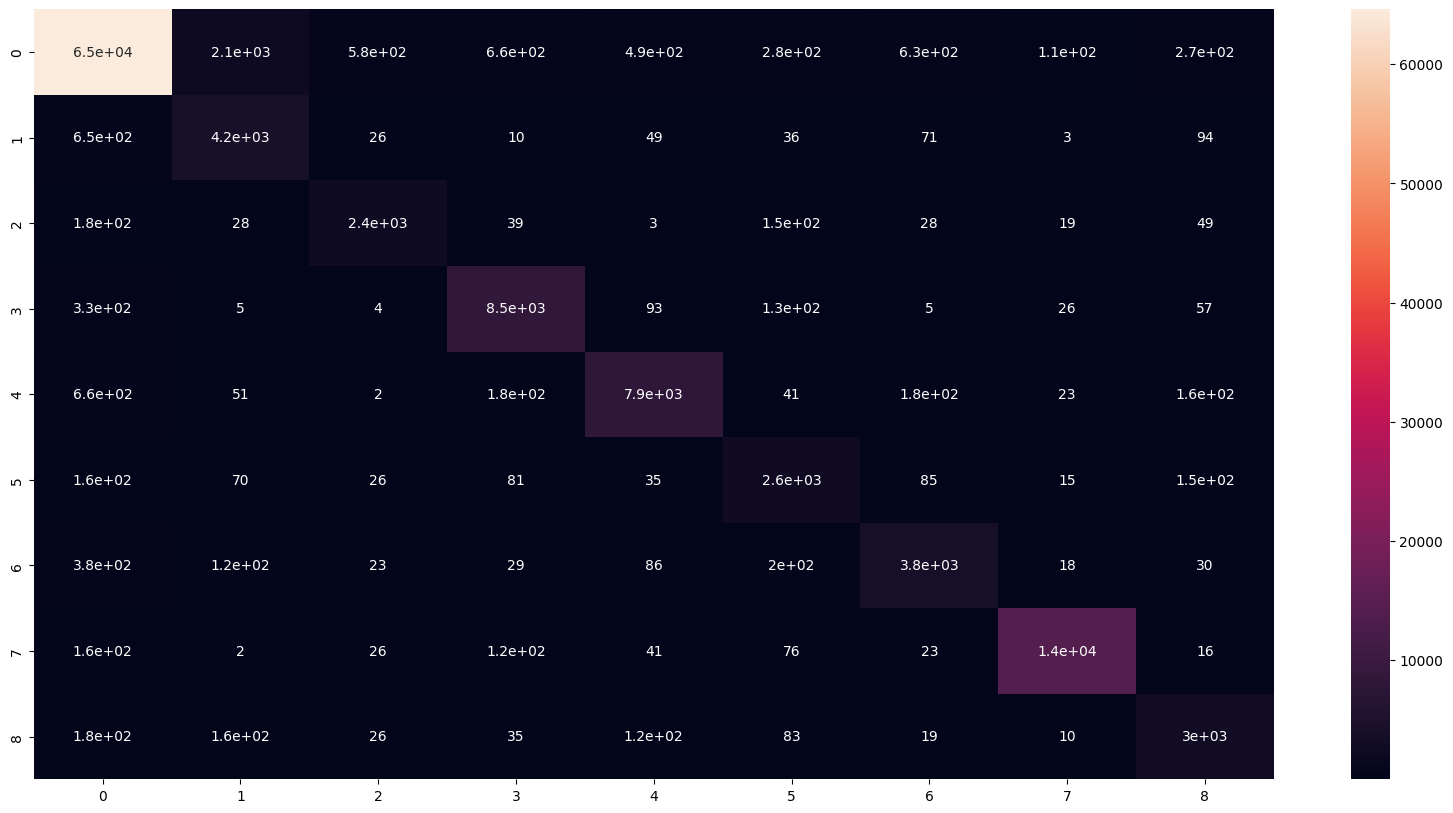

In [88]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, cohen_kappa_score

yhat_probs = (yhat_probs > 0.5) 
labels = y_test
guesses = yhat_probs

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, guesses)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, guesses, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, guesses, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, guesses, average='micro')
print('F1 score: %f' % f1)

auc = roc_auc_score(labels, guesses)
print('ROC AUC: %f' % auc)

import seaborn as sns
matrix = confusion_matrix(labels.argmax(axis=1), guesses.argmax(axis=1))
sns.heatmap(matrix, annot=True)

In [77]:
history.history

{'loss': [9.426197052001953,
  6.039872646331787,
  3.0285470485687256,
  1.604506015777588,
  0.8705442547798157,
  0.6119611263275146,
  0.3708060681819916,
  0.27116331458091736,
  0.23000651597976685,
  0.19215717911720276],
 'accuracy': [0.654761016368866,
  0.7750182747840881,
  0.8754366040229797,
  0.9248676300048828,
  0.9541187882423401,
  0.9654721617698669,
  0.9762134552001953,
  0.9826967120170593,
  0.9858793616294861,
  0.9876149296760559],
 'val_loss': [0.6447529196739197,
  0.7153765559196472,
  0.4793335497379303,
  0.43933501839637756,
  0.4671650230884552,
  0.3988358676433563,
  0.4414563477039337,
  0.41216081380844116,
  0.4149765074253082,
  0.44662269949913025],
 'val_accuracy': [0.7915399074554443,
  0.7756618857383728,
  0.85545414686203,
  0.8675724864006042,
  0.8721715211868286,
  0.895236611366272,
  0.8904102444648743,
  0.905973494052887,
  0.9065155982971191,
  0.9064456224441528]}

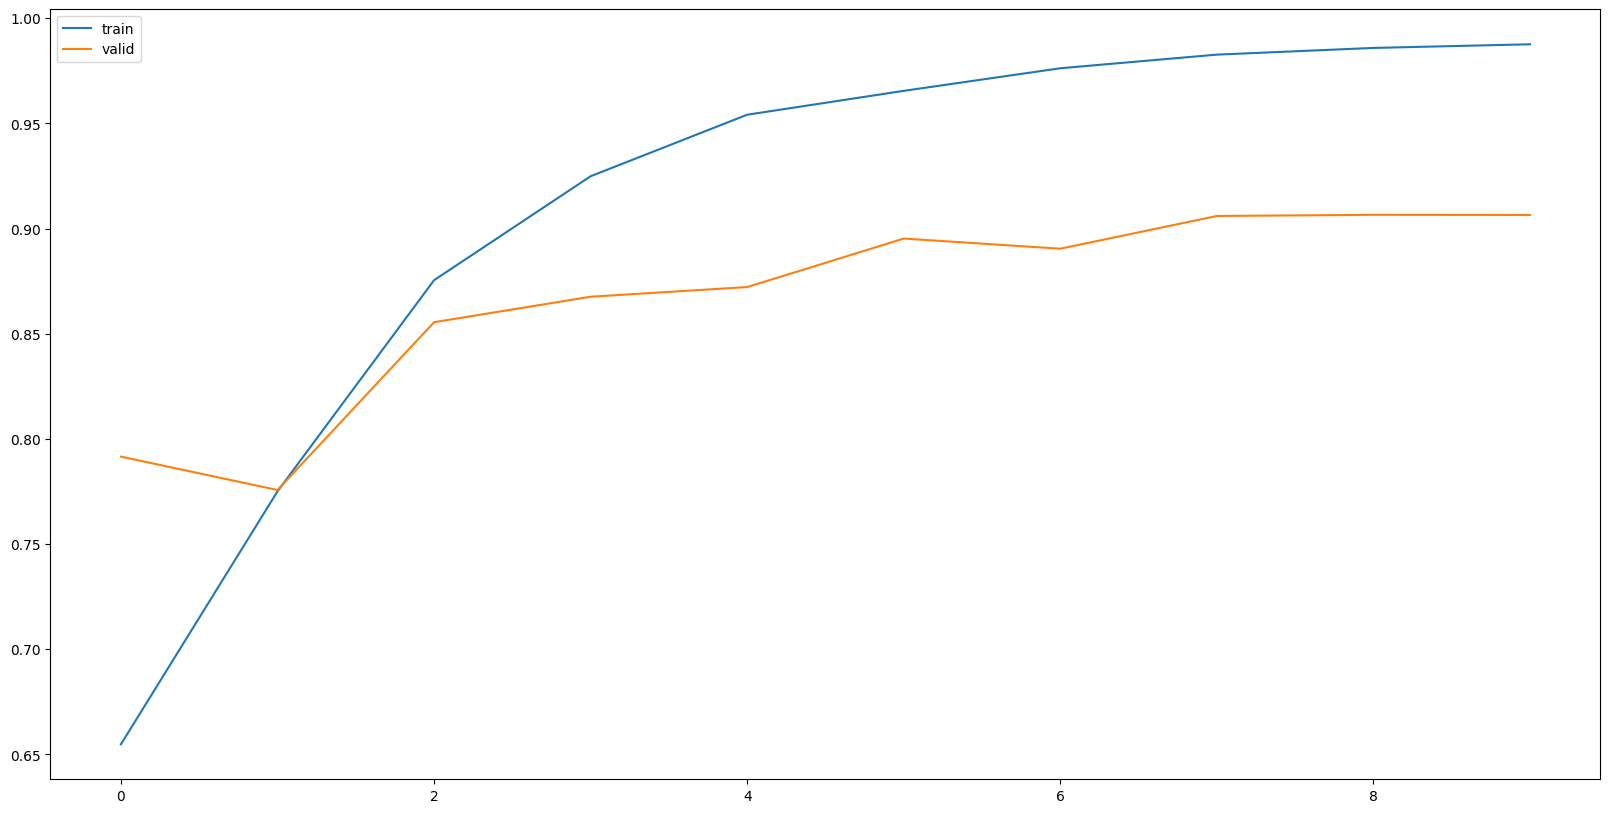

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()

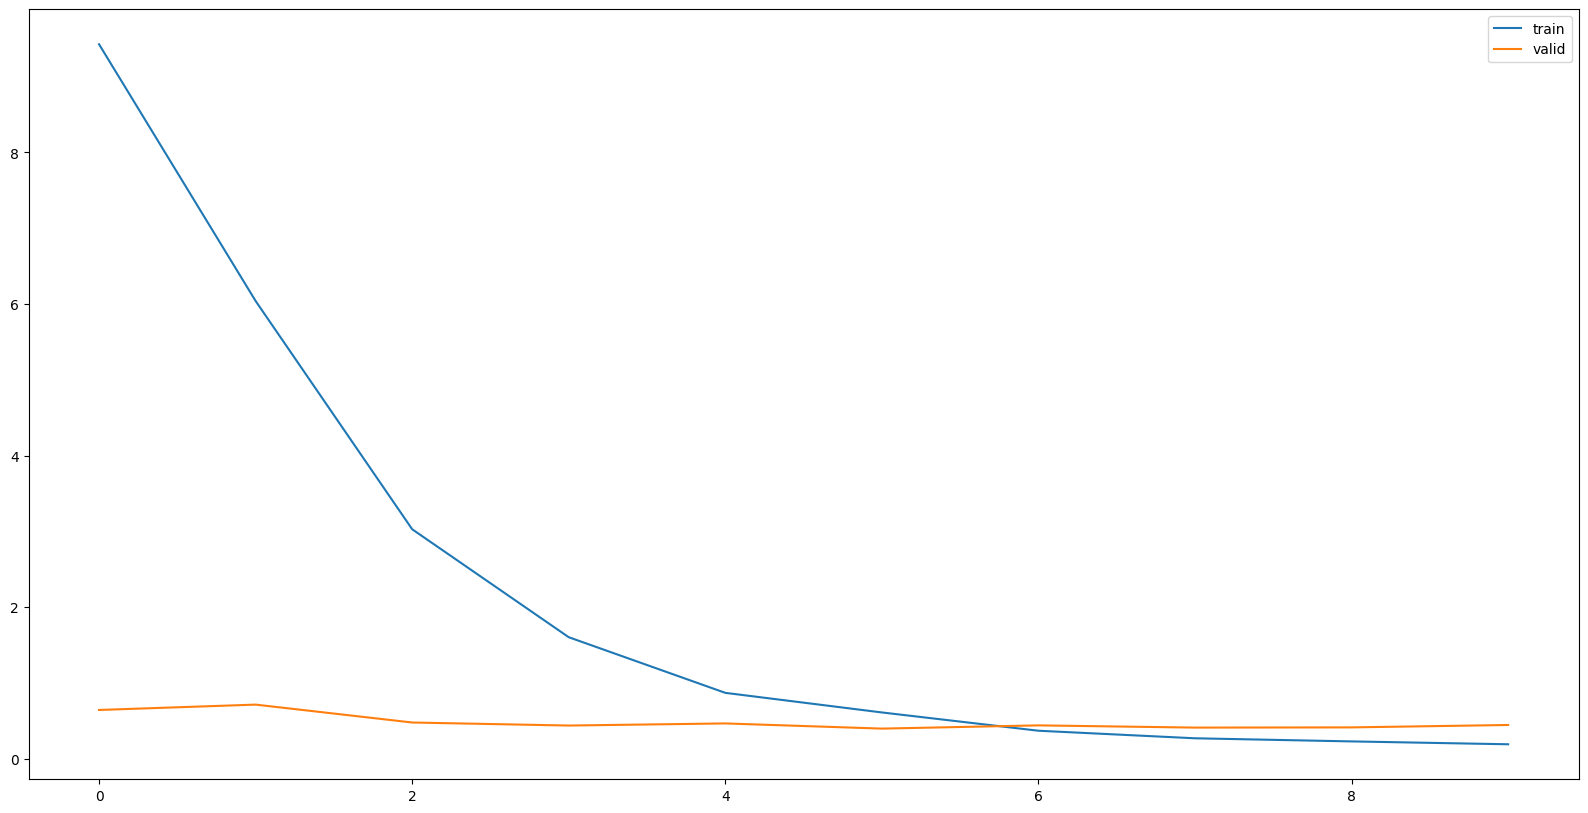

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

In [80]:
model.save('lstm_best.h5')

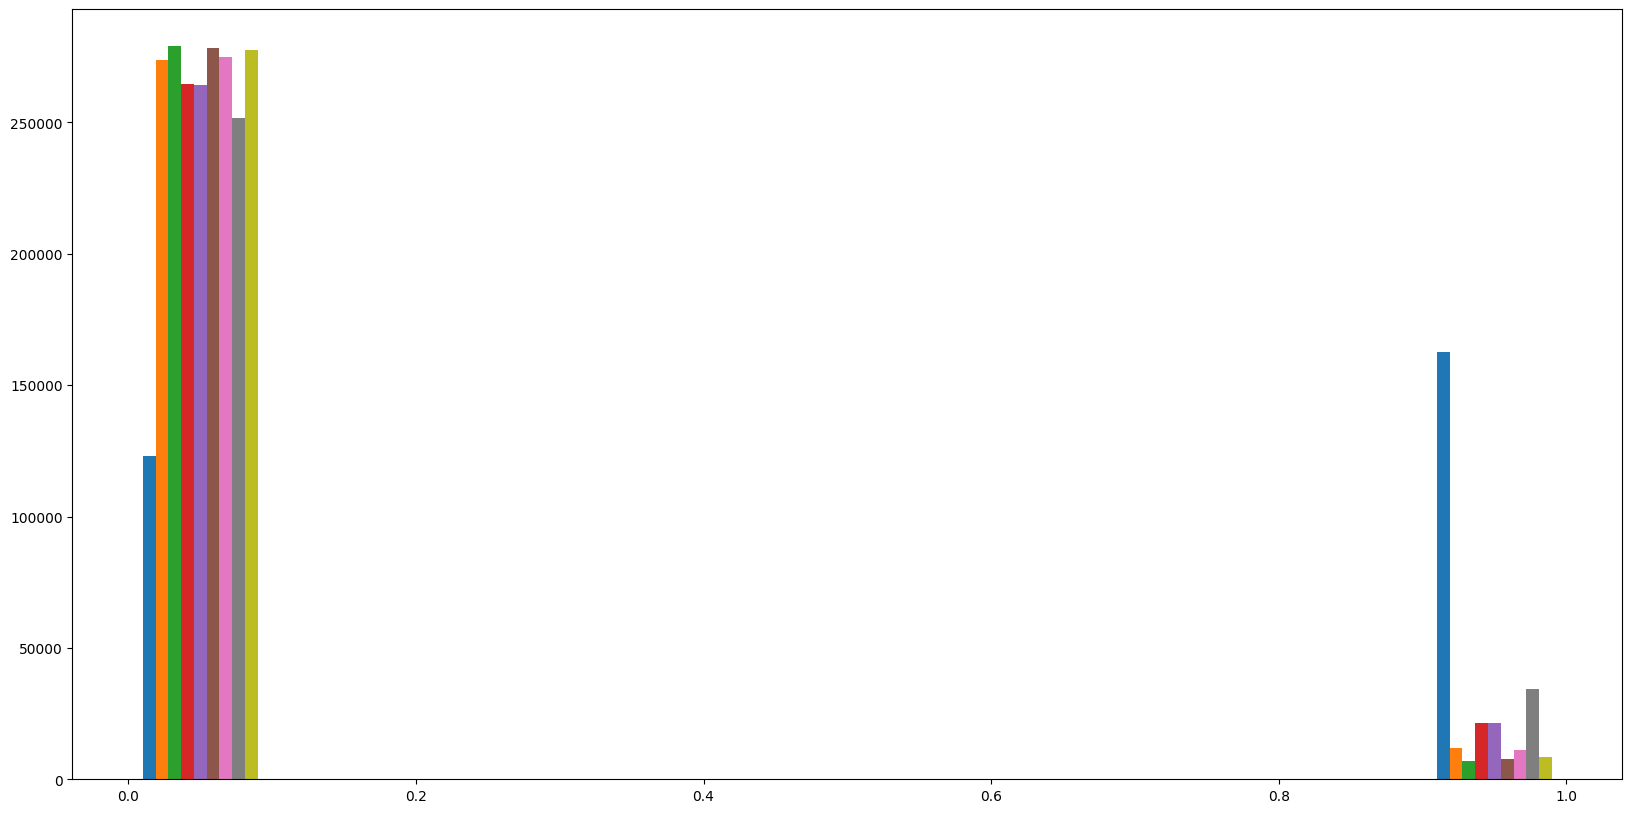

In [90]:
import matplotlib.pyplot as plt
plt.hist(y_train)
plt.show()

In [91]:
from keras.models import load_model

model = load_model('lstm_best.h5')

In [92]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
class_labels = encoder.fit_transform(y_label)

In [98]:
def generate_response():
    input_sentence = input('Enter input news: ')
    Xi_token = tokenizer.texts_to_sequences([input_sentence])
    Xi_pad = pad_sequences(Xi_token, padding='post', maxlen=maxlen)
    print('Model predicts')
    preds = model.predict(Xi_pad)
    print('Confidence :')
    print(preds)
    preds = preds
    total = 0
    for k in range(len(preds[0])):
        print(encoder.inverse_transform([[k]]))
        print('%f %%' %(preds[0,k]*100))
        total += preds[0,k]*100
    #print(total)
    print('Predicted class: %s'%(encoder.inverse_transform(np.argmax(preds, axis=1))))

In [147]:
generate_response()

Enter input news: বিশ্ববাজারে চলছে অর্থনৈতিক মন্দা।
Model predicts
1/1 [==============================] - 0s 126ms/step
Confidence :
[[0.01373076 0.00205704 0.00447263 0.07394931 0.02161004 0.7492058
  0.01315284 0.06031948 0.06150205]]
['bangladesh']
1.373076 %
['economy']
0.205704 %
['education']
0.447263 %
['entertainment']
7.394931 %
['international']
2.161004 %
['life-style']
74.920583 %
['opinion']
1.315284 %
['sports']
6.031948 %
['technology']
6.150205 %
Predicted class: ['life-style']
